In [24]:
import uproot
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep


In [25]:
# open the file for nanoAOD and for heavyneutrino:
nanoEvents = uproot.open("NanoAOD_0_rerun.root")["Events"]
hnEvents = uproot.open("noskim_0.root")["blackJackAndHookers/blackJackAndHookersTree"]

In [26]:
print([key for key in nanoEvents.keys() if "Muon_" in key])

['L1PreFiringWeight_Muon_Nom', 'L1PreFiringWeight_Muon_StatDn', 'L1PreFiringWeight_Muon_StatUp', 'L1PreFiringWeight_Muon_SystDn', 'L1PreFiringWeight_Muon_SystUp', 'Muon_dxy', 'Muon_dxyErr', 'Muon_dxybs', 'Muon_dz', 'Muon_dzErr', 'Muon_eta', 'Muon_ip3d', 'Muon_jetPtRelv2', 'Muon_jetRelIso', 'Muon_mass', 'Muon_miniPFRelIso_all', 'Muon_miniPFRelIso_chg', 'Muon_pfRelIso03_all', 'Muon_pfRelIso03_chg', 'Muon_pfRelIso04_all', 'Muon_phi', 'Muon_pt', 'Muon_ptErr', 'Muon_segmentComp', 'Muon_sip3d', 'Muon_softMva', 'Muon_tkRelIso', 'Muon_tunepRelPt', 'Muon_mvaLowPt', 'Muon_mvaTTH', 'Muon_charge', 'Muon_jetIdx', 'Muon_nStations', 'Muon_nTrackerLayers', 'Muon_pdgId', 'Muon_tightCharge', 'Muon_fsrPhotonIdx', 'Muon_highPtId', 'Muon_highPurity', 'Muon_inTimeMuon', 'Muon_isGlobal', 'Muon_isPFcand', 'Muon_isStandalone', 'Muon_isTracker', 'Muon_jetNDauCharged', 'Muon_looseId', 'Muon_mediumId', 'Muon_mediumPromptId', 'Muon_miniIsoId', 'Muon_multiIsoId', 'Muon_mvaId', 'Muon_mvaLowPtId', 'Muon_pfIsoId', 'Mu

In [27]:
# get muon arrays:
nanomuons = nanoEvents.arrays(["Muon_charge", "nMuon", "Muon_dxy", "Muon_dz", "Muon_eta", "Muon_pt", "Muon_sip3d", "Muon_isPrompt", "Muon_mvaTOP", "Muon_isPFcand", "Muon_isGlobal", "Muon_isTracker", "Muon_corrected_pt", "Muon_provenanceConversion", "Muon_motherPdgId", "Muon_jetPtRatio"])
hnmuons = hnEvents.arrays(["_lCharge", "_lPt", "_lEta", "_lPhi", "_lFlavor", "_lIsPrompt", "_3dIPSig", "_dxy", "_dz", "_leptonMvaTOPUL", "_lPtCorr", "_lProvenanceConversion", "_lMomPdgId", "_ptRatio"], cut="_lFlavor==1")

In [28]:
# nanomasking:
pt_mask = nanomuons["Muon_pt"] > 10
eta_mask = np.fabs(nanomuons["Muon_eta"]) < 2.4
# prompt_mask = nanomuons["Muon_isPrompt"] == 1
global_mask = (nanomuons["Muon_isGlobal"] == True) | (nanomuons["Muon_isTracker"] == True)
pfmuon_mask = nanomuons["Muon_isPFcand"] == True

total_mask = pt_mask & eta_mask & pfmuon_mask & global_mask
# nanomuons.Muon_pt[total_mask]

In [29]:
# heavy neutrino masking:
hn_mask = hnmuons["_lPt"] > 10
hn_mask = hn_mask & (np.fabs(hnmuons["_lEta"]) < 2.4)
# hn_mask = hn_mask & (hnmuons["_lIsPrompt"] == 1)


In [30]:
ak.flatten(nanomuons.Muon_pt[total_mask])

<Array [10.2, 10.1, 50.8, 12.6, ..., 11.3, 49.3, 34.8] type='405 * float32'>

In [31]:
# plotting
def plot_macro(nanoinfo, hninfo, nbins, binrange):
    plt.hist(ak.flatten(hninfo[hn_mask]), bins=nbins, range=binrange, histtype="step", label="heavy neutrino")
    plt.hist(ak.flatten(nanoinfo[total_mask]), bins=nbins, range=binrange, histtype="step", label="nanoAOD")
    plt.legend()
    plt.show()

In [32]:
print(ak.any(ak.flatten(nanomuons.Muon_isPFcand[total_mask]) == False))

False


405
405


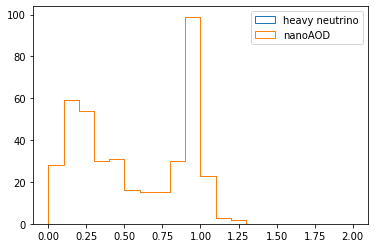

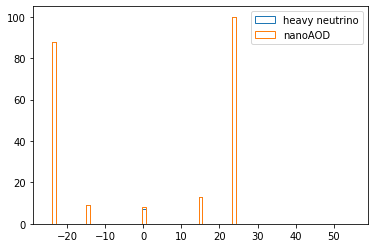

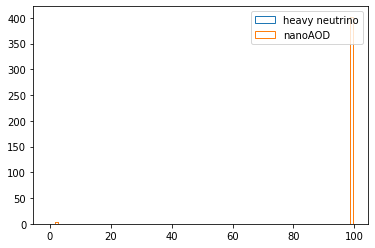

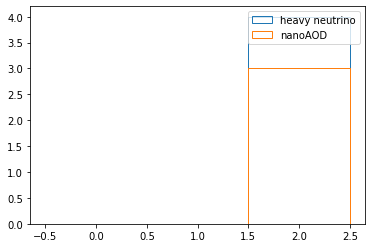

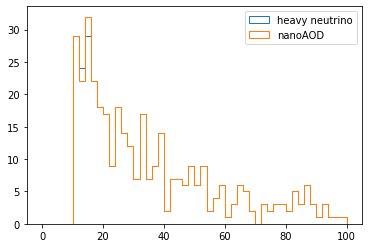

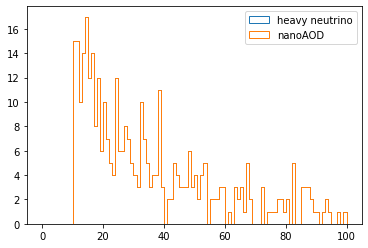

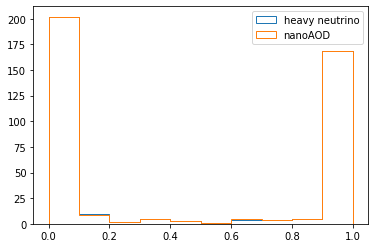

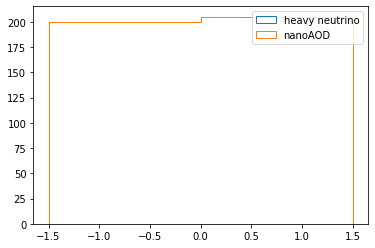

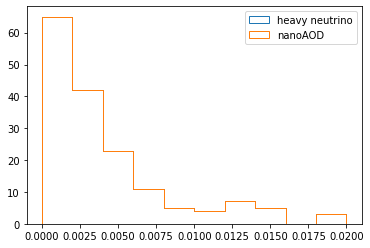

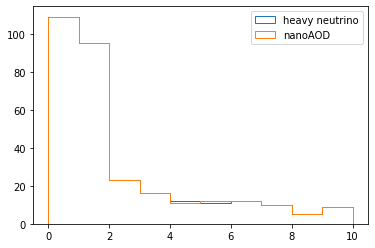

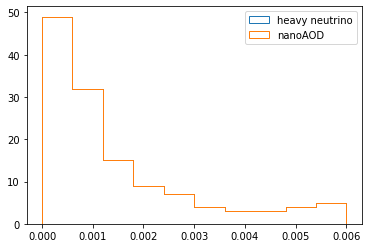

In [33]:
print(ak.count(ak.flatten(nanomuons.Muon_pt[total_mask])))
print(ak.count(ak.flatten(hnmuons._lPt[hn_mask])))
plot_macro(nanomuons.Muon_jetPtRatio, hnmuons._ptRatio, 20, (0, 2))
plot_macro(nanomuons.Muon_motherPdgId, hnmuons._lMomPdgId, 81, (-25, 55))
plot_macro(nanomuons.Muon_provenanceConversion, hnmuons._lProvenanceConversion, 100, (-0.5, 99.5))
plot_macro(nanomuons.Muon_provenanceConversion, hnmuons._lProvenanceConversion, 3, (-0.5, 2.5))
plot_macro(nanomuons.Muon_corrected_pt, hnmuons._lPtCorr, 50, (0, 100))
plot_macro(nanomuons.Muon_pt, hnmuons._lPt, 100, (0, 100))
plot_macro(nanomuons.Muon_mvaTOP, hnmuons._leptonMvaTOPUL, 10, (0., 1))
plot_macro(nanomuons.Muon_charge, hnmuons._lCharge, 2, (-1.5, 1.5))
plot_macro(nanomuons.Muon_dz, hnmuons._dz, 10, (0, 0.02))
plot_macro(nanomuons.Muon_sip3d, hnmuons._3dIPSig, 10, (0, 10))
plot_macro(nanomuons.Muon_dxy, hnmuons._dxy, 10, (0, 0.006))


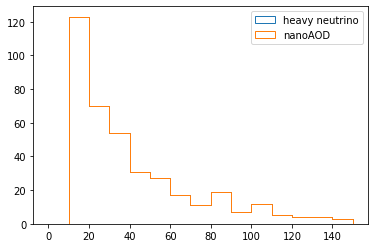

In [34]:
plot_macro(nanomuons.Muon_pt, hnmuons._lPt, 15, (0, 150))


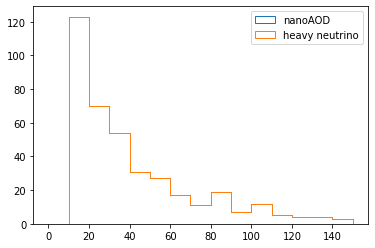

In [35]:
# plotting
plt.hist(ak.flatten(nanomuons.Muon_pt[total_mask]), bins=15, range=(0, 150), histtype="step", label="nanoAOD")
plt.hist(ak.flatten(hnmuons._lPt[hn_mask]), bins=15, range=(0, 150), histtype="step", label="heavy neutrino")
plt.legend()
plt.show()

In [36]:
# same for electrons:
nanoel = nanoEvents.arrays(["Electron_charge", "nElectron", "Electron_dxy", "Electron_dz", "Electron_phi", "Electron_eta", "Electron_pt", "Electron_sip3d", "Electron_isPrompt", "Electron_mvaTOP", "Electron_convVeto", "Electron_lostHits", "Electron_deltaEtaSC", "Electron_miniPFRelIso_all", "Electron_tightCharge", "Electron_mvaFall17V2noIso_WPL", "Electron_eCorr", "Electron_provenanceConversion", "Electron_motherPdgId", "Electron_jetPtRatio"])
hnel = hnEvents.arrays(["_lCharge", "_lPt", "_lEta", "_lPhi", "_lFlavor", "_lIsPrompt", "_3dIPSig", "_dxy", "_dz", "_leptonMvaTOPUL", "_lElectronPassConvVeto", "_lElectronMissingHits", "_lEtaSC", "_miniIso", "_lElectronChargeConst", "_lElectronPassMVAFall17NoIsoWPLoose", "_lPtCorr", "_lProvenanceConversion", "_lMomPdgId", "_ptRatio"], cut="_lFlavor==0")


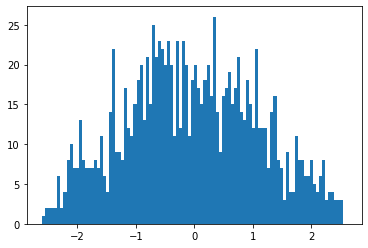

In [37]:
# electron masking in nano:
pt_mask_el = (nanoel["Electron_pt"] * nanoel["Electron_eCorr"])> 10
eta_mask_el = np.fabs(nanoel["Electron_eta"]) < 2.5
# prompt_mask_el = nanoel["Electron_isPrompt"] == 1
# pfmuon_mask_el = nanoel["Electron_isPFcand"] == True
sip3d_mask = nanoel["Electron_sip3d"] < 8
missinghits_mask = nanoel["Electron_lostHits"] < 2
sceta =  (nanoel["Electron_deltaEtaSC"] + nanoel["Electron_eta"])
gap_mask = (np.fabs(nanoel["Electron_eta"]) < 1.4442) | (np.fabs(nanoel["Electron_eta"]) > 1.566)
gap_mask = (np.fabs(sceta) < 1.4442) | (np.fabs(sceta) > 1.566)
plt.hist(ak.flatten(nanoel["Electron_deltaEtaSC"] + nanoel["Electron_eta"]), bins=100, range=(-2.6, 2.6))
miniiso_mask = nanoel["Electron_miniPFRelIso_all"] < 0.4
dxymask = np.fabs(nanoel["Electron_dxy"]) < 0.05
dzmask = np.fabs(nanoel["Electron_dz"]) < 0.1
# mvafall17_mask = nanoel["Electron_mvaFall17V2noIso_WPL"] == 1
# conversionveto_mask = nanoel["Electron_convVeto"] == 1
# tightcharge_mask = nanoel["Electron_tightCharge"] == 2

# lepMVA_or_FO = (nanoel["Electron_mvaTOP"] > 0.81) | ((nanoel["Electron_mvaFall17V2noIso_WPL"] == 1))


total_mask_el = pt_mask_el & eta_mask_el & gap_mask & missinghits_mask & sip3d_mask & miniiso_mask & dxymask & dzmask  # & conversionveto_mask & tightcharge_mask # & lepMVA_or_FO


In [38]:
# electron masking in hn:
hn_mask_el = hnel["_lPtCorr"] > 10
hn_mask_el = hn_mask_el & (np.fabs(hnel["_lEta"]) < 2.5)
hn_mask_el = hn_mask_el & ((np.fabs(hnel["_lEtaSC"]) < 1.4442) | (np.fabs(hnel["_lEtaSC"]) > 1.566))
hn_mask_el = hn_mask_el & (hnel["_lElectronMissingHits"] < 2)
hn_mask_el = hn_mask_el & (hnel["_3dIPSig"] < 8)
hn_mask_el = hn_mask_el & (hnel["_miniIso"] < 0.4)
hn_mask_el = hn_mask_el & (np.fabs(hnel["_dxy"]) < 0.05)
hn_mask_el = hn_mask_el & (np.fabs(hnel["_dz"]) < 0.1)
# hn_mask_el = hn_mask_el & (hnel["_lElectronPassConvVeto"] == True)
# hn_mask_el = hn_mask_el & (hnel["_lElectronChargeConst"] == True)
# hn_mask_el = hn_mask_el & ((hnel["_lElectronPassMVAFall17NoIsoWPLoose"] == 1) | (hnel["_leptonMvaTOPUL"] > 0.81))
# hn_mask_el = hn_mask_el & (hnel["_lIsPrompt"] == 1)


In [39]:
def plot_macro_el(nanoinfo, hninfo, nbins, binrange):
    plt.hist(ak.flatten(hninfo[hn_mask_el]), bins=nbins, range=binrange, histtype="step", label="heavy neutrino")
    plt.hist(ak.flatten(nanoinfo[total_mask_el]), bins=nbins, range=binrange, histtype="step", label="nanoAOD")
    plt.legend()
    plt.show()

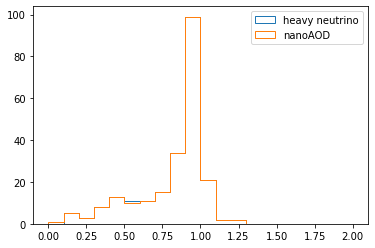

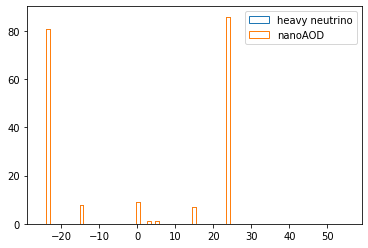

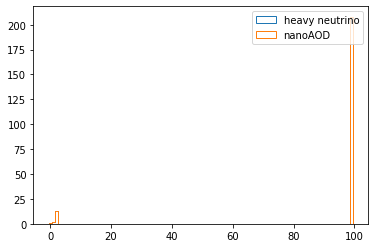

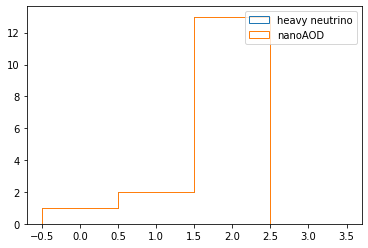

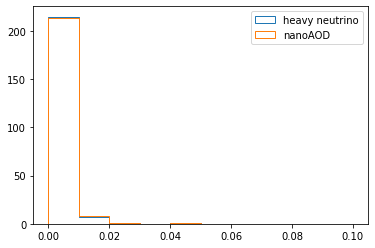

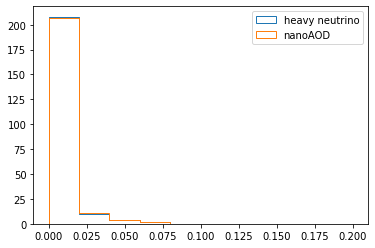

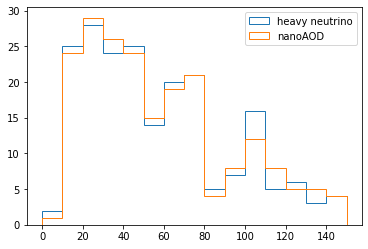

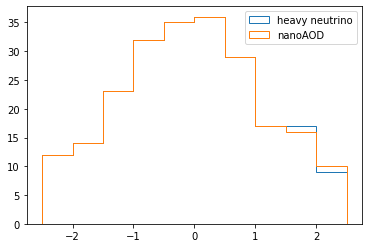

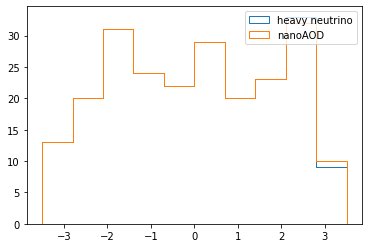

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


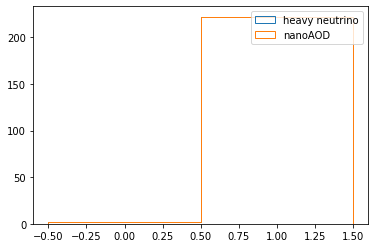

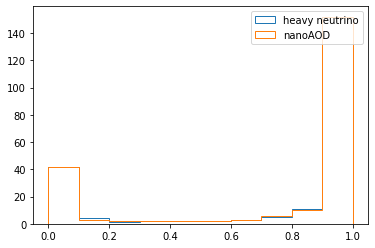

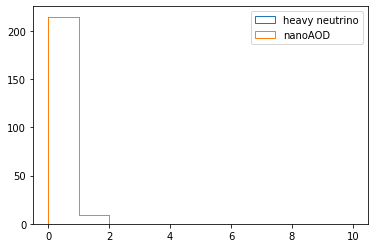

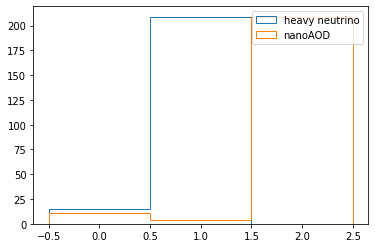

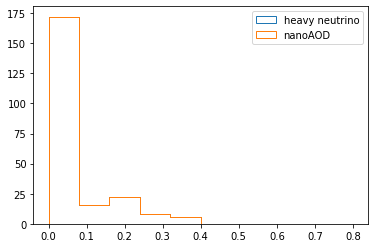

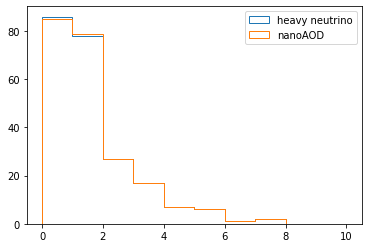

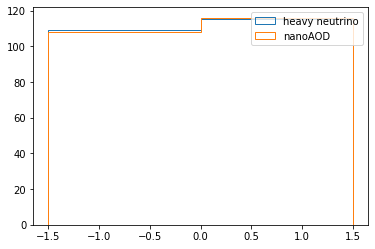

In [40]:
plot_macro_el(nanoel.Electron_jetPtRatio, hnel._ptRatio, 20, (0, 2))
plot_macro_el(nanoel.Electron_motherPdgId, hnel._lMomPdgId, 81, (-25, 55))
plot_macro_el(nanoel.Electron_provenanceConversion, hnel._lProvenanceConversion, 100, (-0.5, 99.5))
plot_macro_el(nanoel.Electron_provenanceConversion, hnel._lProvenanceConversion, 4, (-0.5, 3.5))
plot_macro_el(np.fabs(nanoel.Electron_dxy), np.fabs(hnel._dxy), 10, (0, 0.1))
plot_macro_el(np.fabs(nanoel.Electron_dz), np.fabs(hnel._dz), 10, (0, 0.2))
plot_macro_el(nanoel.Electron_pt, hnel._lPt, 15, (0, 150))
plot_macro_el(nanoel.Electron_eta, hnel._lEta, 10, (-2.5, 2.5))
plot_macro_el(nanoel.Electron_phi, hnel._lPhi, 10, (-3.5, 3.5))
plot_macro_el(nanoel.Electron_convVeto, hnel._lElectronPassConvVeto, 2, (-0.5, 1.5))
plot_macro_el(nanoel.Electron_mvaTOP, hnel._leptonMvaTOPUL, 10, (0., 1))
plot_macro_el(nanoel.Electron_lostHits, hnel._lElectronMissingHits, 10, (0, 10))
plot_macro_el(nanoel.Electron_tightCharge, hnel._lElectronChargeConst, 3, (-0.5, 2.5))
plot_macro_el(nanoel.Electron_miniPFRelIso_all, hnel._miniIso, 10, (0, 0.8))
plot_macro_el(nanoel.Electron_sip3d, hnel._3dIPSig, 10, (0, 10))
plot_macro_el(nanoel.Electron_charge, hnel._lCharge, 2, (-1.5, 1.5))

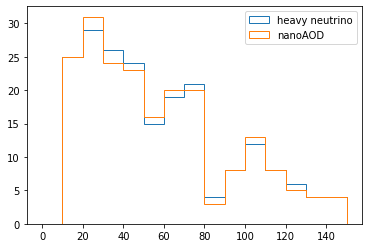

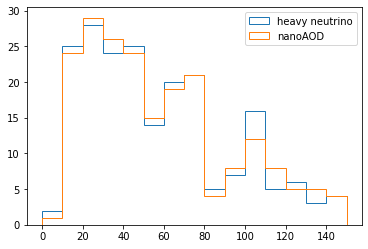

In [41]:
plot_macro_el(nanoel.Electron_pt * nanoel.Electron_eCorr, hnel._lPtCorr, 15, (0, 150))
plot_macro_el(nanoel.Electron_pt, hnel._lPt, 15, (0, 150))



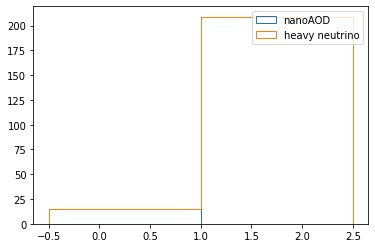

In [42]:
# zoom on tight charge$
plt.hist(ak.flatten(nanoel.Electron_tightCharge[total_mask_el][nanoel.Electron_tightCharge[total_mask_el] > 1]), bins=2, range=(-0.5, 2.5), histtype="step", label="nanoAOD")
plt.hist(ak.flatten(hnel._lElectronChargeConst[hn_mask_el]), bins=2, range=(-0.5, 2.5), histtype="step", label="heavy neutrino")
# plt.hist(ak.flatten(hnel.[hn_mask_el]), bins=nbins, range=binrange, histtype="step", label="heavy neutrino")
# plt.hist(ak.flatten(nanoinfo[total_mask_el]), bins=nbins, range=binrange, histtype="step", label="nanoAOD")
plt.legend()
plt.show()

In [43]:
# now for jets:
# load nanoaod and hn jets:
# start using smeared momenta
nanojets = nanoEvents.arrays(["Jet_pt", "Jet_eta", "Jet_phi", "Jet_jetId", "Jet_btagDeepFlavB", "Jet_pt_nom"], cut="(Jet_pt_nom > 25) & (Jet_jetId >= 2)")
hnjets = hnEvents.arrays(["_jetPt", "_jetEta", "_jetPhi", "_jetIsTight", "_jetDeepFlavor", "_jetSmearedPt"], cut="(_jetSmearedPt > 25) & (_jetIsTight == 1)")

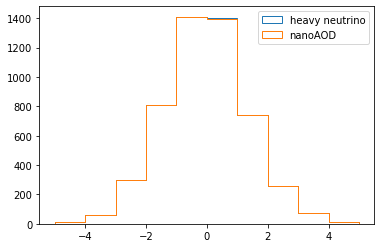

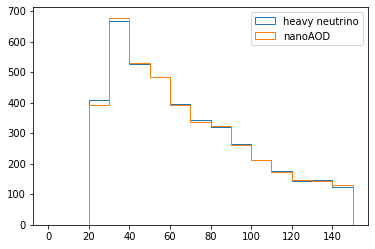

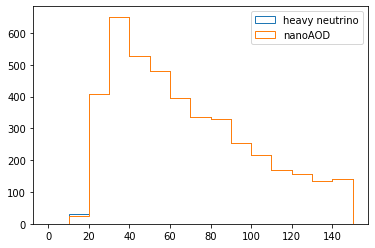

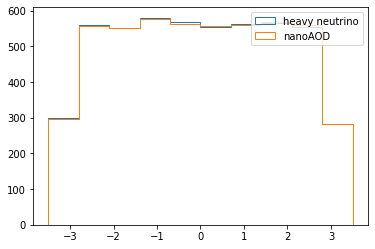

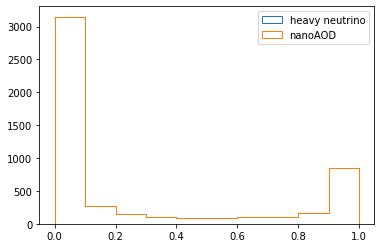

In [44]:
def plot_macro_jets(nanoinfo, hninfo, nbins, binrange):
    plt.hist(ak.flatten(hninfo), bins=nbins, range=binrange, histtype="step", label="heavy neutrino")
    plt.hist(ak.flatten(nanoinfo), bins=nbins, range=binrange, histtype="step", label="nanoAOD")
    plt.legend()
    plt.show()

plot_macro_jets(nanojets.Jet_eta, hnjets._jetEta, 10, (-5, 5))
plot_macro_jets(nanojets.Jet_pt_nom, hnjets._jetSmearedPt, 15, (0, 150))
plot_macro_jets(nanojets.Jet_pt, hnjets._jetPt, 15, (0, 150))
plot_macro_jets(nanojets.Jet_phi, hnjets._jetPhi, 10, (-3.5, 3.5))
plot_macro_jets(nanojets.Jet_btagDeepFlavB, hnjets._jetDeepFlavor, 10, (0, 1))